In [58]:
__author__ = "@Tssp"
__date__   = "23/01/21"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
from matplotlib.ticker import AutoMinorLocator
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18
aur = (1 + np.sqrt(5)) / 2
aursize = (4.3*aur, 4.3)

In [2]:
delta = np.loadtxt('Simulations/delta_asc_ix6603.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc_ix6603.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [3]:
# Parameters and Constants:
mass  = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky    = 2*np.pi/lambd
Iy    = 4993 * (1e4 / Eh * to * ao**2)
Vy    = alpha * Iy # a.u
Iy    = Vy/alpha
wy    = np.sqrt( 2 * Vy * ky**2 / mass)       
dho   = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [4]:
print(os.getcwd())
folder_path = "Simulations/ix4993_iy4993_iz50/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q1d


In [5]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x18000_y18000_z18000_120rm8g2l60m8_68CM8g1L60M8_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix4993_iy4993_iz50_LiLi_a3Sup_0{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_int_rm250_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.69000', '.69100', '.69200', '.69300', '.69400', '.69500', '.69600', '.69700', '.69800', '.69900', '.70000', '.70100', '.70200', '.70300', '.707666', '.707891', '.7081066', '.7083468', '.708483', '.708822', '.7090032', '.7090948', '.7092404', '.7091583', '.71035', '.71040', '.71045', '.71050', '.71055', '.71060', '.71065', '.71070', '.71075', '.71080', '.71085', '.71090', '.71095', '.71100', '.71105', '.71110', '.71115', '.71120', '.71125', '.71130', '.71135', '.71140', '.71145', '.71150', '.71155', '.71160', '.71165', '.71170', '.71175', '.71180', '.71185', '.71190', '.71195', '.71200', '.71205', '.71210', '.71215', '.71220', '.71225', '.71230', '.71235', '.71240', '.71245', '.71250', '.71255', '.71260', '.71265', '.71270', '.71275', '.71280', '.71285', '.71290', '.71295', '.71300', '.71305', '.71310', '.71315', '.71320', '.71325', '.71330', '.71335', '.71340', '.71345', '.71350', '.71355', '.71360', '.71365', '.71370', '.71375', '.71380'

In [6]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [7]:
dic = transpose_energies(Data)

In [8]:
least_bound_pos = 1052

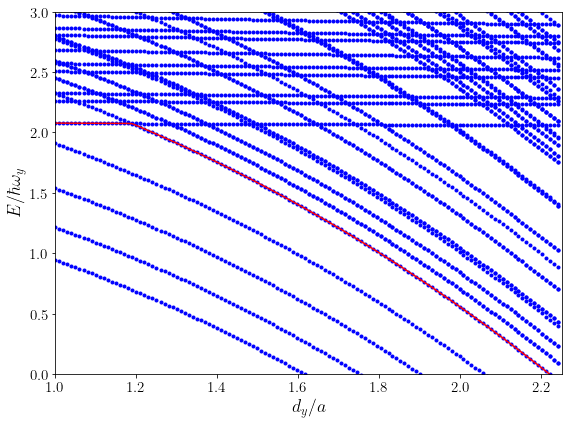

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 100):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'b.')
ax.plot(x, dic['nivel_1056']/wy, 'r')
#ax.plot(x, dic['nivel_1000']/wy, 'r')
ax.set_ylim(0, 3)
ax.set_xlim(1, 2.25)
ax.set_xlabel('$d_{y}/a$')
ax.set_ylabel('$E/\hbar \omega_{y}$')
plt.tight_layout()
#fig.savefig('Results/Figures/Ix4993_Iy4993_Iz50_400_Easc.png', dpi=200)
plt.show()

# Crosses

In [10]:
%matplotlib inline

## Resonance x>1

1069
1070
1071
1072
1073
1074
1075
1076
1077
1078


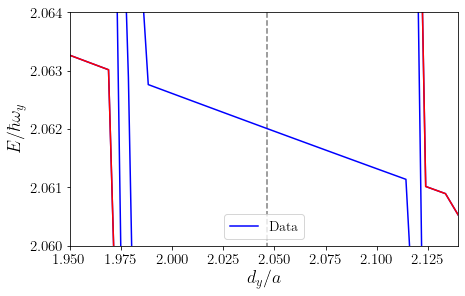

In [64]:
fig2, ax2 = plt.subplots(figsize=aursize)
xpol = np.linspace(x[0], x[-1], num=50)
for i in range(least_bound_pos+17, least_bound_pos + 27):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.plot(x, dic['nivel_1069']/wy, 'r')
ax2.plot(x, dic['nivel_1074']/wy, 'r')
ax2.plot(x, dic['nivel_1078']/wy, 'r')
ax2.vlines(x[30], 2.059, 2.076, alpha=0.5, linestyles='--')
ax2.vlines(x[20], 2.059, 2.076, alpha=0.5, linestyles='--')
ax2.vlines(x[9], 2.059, 2.076, alpha=0.5, linestyles='--')
ax2.vlines(x[2], 2.059, 2.076, alpha=0.5, linestyles='--')
ax2.set_ylim(2.060, 2.064)
ax2.set_xlim(1.95, 2.14)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
#plt.savefig('Results/Figures/Ix4993_Iy4993_Iz4993_Easc_Zoom.png', dpi=200)
plt.show()

In [35]:
print('''f Eigenstates:
1064: (0,2,4)
1066: (0,2,6)
1067: (0,0,16)
1068: (0,2,8)
1069: trap
1070: (2,0,10)
1071: (0,2,10)
1072: (0,0,18)
1073: (4,0,0)
1074: (0,4,0)
1078: (2,2,0)
''')

f Eigenstates:
1064: (0,2,4)
1066: (0,2,6)
1067: (0,0,16)
1068: (0,2,8)
1069: trap
1070: (2,0,10)
1071: (0,2,10)
1072: (0,0,18)
1073: (4,0,0)
1074: (0,4,0)
1078: (2,2,0)



In [74]:
print(f'''To find the eigenstates:
x={x[30]}, delta=0{delta[30]}
x={x[20]}, delta=0{delta[20]}
x={x[9]}, delta=0{delta[9]}
x={x[2]}, delta=0{delta[2]}''')

To find the eigenstates:
x=1.9493339400101208, delta=0.70550
x=2.0465192587369625, delta=0.70500
x=2.1530356634114245, delta=0.70445
x=2.2206089225551335, delta=0.70410


In [50]:
%matplotlib

Using matplotlib backend: MacOSX


In [52]:
fig2, ax2 = plt.subplots(figsize=aursize)
for i in range(least_bound_pos+17, least_bound_pos + 27):
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.set_ylim(2.060, 2.064)
ax2.set_xlim(1.95, 2.14)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
plt.grid()
xcoord = []
ycoord = []
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    plt.plot(ix, iy, 'ro', markersize=4)
    plt.draw()
    global xcoord, ycoord
    xcoord.append(ix)
    ycoord.append(iy)
    if len(xcoord) == 30:
        fig2.canvas.mpl_disconnect(cid)
        print(f'xcoord: {xcoord}\n ycoord: {ycoord}')
    return xcoord, ycoord
cid = fig2.canvas.mpl_connect('button_press_event', onclick)
plt.show()

xcoord: [1.9505194095133949, 1.9531164570803714, 1.9566224712957898, 1.9605180426462545, 1.9646733187534169, 1.9672703663203934, 1.9893452706396935, 1.9951886276653905, 2.0011618370694366, 2.0071350464734823, 2.0131082558775284, 2.019341170038272, 2.023626298523783, 2.0293398031711316, 2.035702569710224, 2.0438832695461997, 2.052843083652269, 2.0620626025150353, 2.0706328594860577, 2.079982230727173, 2.086474849644614, 2.092577911427009, 2.0981615636960087, 2.102966101694915, 2.1076407873154728, 2.112055768179333, 2.124391744122471, 2.1269887916894477, 2.131014215418261, 2.1337411153635863]
 ycoord: [2.06326003439318, 2.063216128206067, 2.0631722220189532, 2.0631283158318396, 2.0630648957837865, 2.0630356249923776, 2.0627624309392267, 2.0626648616345302, 2.062586806190773, 2.062518507677485, 2.0624355737684925, 2.062367275255205, 2.062303855207152, 2.0622306782286297, 2.0621477443196374, 2.0620257826887665, 2.0619184564536, 2.0618013732879636, 2.0616940470527974, 2.0615720854219264, 2.

In [101]:
%matplotlib inline

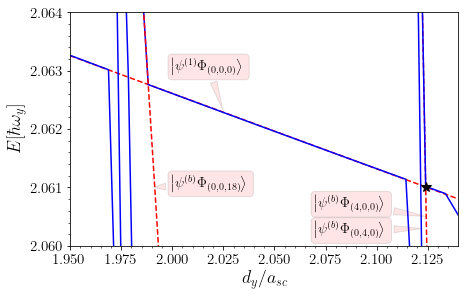

In [143]:
fig3, ax3 = plt.subplots(figsize=aursize)
# nivel 1069:
f1069 = np.polyfit(xcoord, ycoord, deg=1)
x1069 = np.linspace(1.95, 2.14, num=40)
ax3.plot(x1069, np.polyval(f1069, x1069), 'r--', markersize=4, label='Diabatic')
ax3.plot(x, dic['nivel_1069']/wy, 'b', label='Adiabatic')

# nivel 1070:
ax3.plot(x, dic['nivel_1070']/wy, 'b')

# nivel 1071:
ax3.plot(x, dic['nivel_1071']/wy, 'b')

# nivel 1072:
ax3.plot(x, dic['nivel_1072']/wy, 'b')
f1072 = np.polyfit(x[(x < 1.995) & (x > 1.975)], np.array(dic['nivel_1072'])[(x < 1.995) & (x > 1.975)]/wy, deg=1)
x1072 = np.linspace(1.95, 2.14, num=200)
ax3.plot(x1072, np.polyval(f1072, x1072), 'r--', markersize=4)

# nivel 1073:
ax3.plot(x, dic['nivel_1073']/wy, 'b')

# nivel 1074:
f1074 = np.polyfit(x[(x < 2.125) & (x > 2.114)], np.array(dic['nivel_1074'])[(x < 2.125) & (x > 2.114)]/wy, deg=1)
x1074 = np.linspace(1.95, 2.14, num=200)
ax3.plot(x1074, np.polyval(f1074, x1074), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1074']/wy, 'b')

# Crosses:
##########
#ax3.plot(cross_points(f1069, f1072), np.polyval(f1069, cross_points(f1069, f1072)), 'k*', markersize=10, label='ICIR')
ax3.plot(cross_points(f1069, f1074), np.polyval(f1069, cross_points(f1069, f1074)), 'k*', markersize=10)

# States:
#########
ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(2.025, 2.0623), xytext=(2, 2.063), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,0,18)}\right>$', xy=(1.99, 2.061), xytext=(2, 2.061), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(4,0,0)}\right>$', xy=(2.125, 2.0605), xytext=(2.07, 2.06065), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,4,0)}\right>$', xy=(2.123, 2.0603), xytext=(2.07, 2.0602), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,4,0)}\right>$', xy=(1.75, 3.38), xytext=(1.75, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,2)}\right>$', xy=(1.843, 3.38), xytext=(1.80, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,2)}\right>$', xy=(1.843, 3.38), xytext=(1.85, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,2,0)}\right>$', xy=(1.86, 3.349), xytext=(1.85, 3.33), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))


ax3.set_xlabel('$d_{y}/a_{sc}$')
ax3.set_ylabel('$E[\hbar \omega_{y}]$')
#ax3.legend(fontsize=14, bbox_to_anchor=(1.03, 1))
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.set_ylim(2.060, 2.064)
ax3.set_xlim(1.95, 2.14)
#plt.tight_layout()
fig3.savefig('Results/Figures/Ix4993_Iy4993_Iz4993_Easc_Interpolation_400_v2.png', bbox_inches="tight", dpi=200)

In [135]:
print(f'''Crosses between (x, E):
* 1069-1074: ({cross_points(f1069, f1074)}, {np.polyval(f1069, cross_points(f1069, f1074))})''')

Crosses between (x, E):
* 1069-1074: (2.124029883221144, 2.0610098535988337)


In [72]:
print(f'''ICIR: asc/dy:
* 1069-1074: {1/cross_points(f1069, f1074)}''')

ICIR: asc/dy:
* 1069-1074: 0.470803168966472


In [27]:
#np.savetxt('Results/ICIR_positions_4993_4993_50.txt', 
#           [[1], [1/cross_points(f1004, f1007)], [np.polyval(f1004, cross_points(f1004, f1007))]], 
#           header='wx/wy, asc/dy, E/hwy', )